In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from matplotlib import style
style.use("ggplot")

In [7]:
df=pd.read_csv("/kaggle/input/udemy-top-5k-course-2022/data.csv")
df.head

<bound method NDFrame.head of                                             course_name  \
0     2022 Complete Python Bootcamp From Zero to Her...   
1                       The Web Developer Bootcamp 2022   
2            The Complete 2022 Web Development Bootcamp   
3           Angular - The Complete Guide (2023 Edition)   
4     Java Programming Masterclass covering Java 11 ...   
...                                                 ...   
5022  Siemens WinCC SCADA Programming, SCADA1 ( Basic )   
5023  Python Object Oriented Programming (OOP): Begi...   
5024                                jQuery Basics Guide   
5025  Introduction to Android Development for beginners   
5026                                                NaN   

                                             instructor  \
0                                         Jose Portilla   
1                                           Colt Steele   
2                                         Dr. Angela Yu   
3                        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   course_name           5013 non-null   object
 1   instructor            5016 non-null   object
 2   course url            5020 non-null   object
 3   course image          5017 non-null   object
 4   course description    5016 non-null   object
 5   reviews_avg           5017 non-null   object
 6   reviews_count         5017 non-null   object
 7   course_duration       5017 non-null   object
 8   lectures_count        5017 non-null   object
 9   level                 5017 non-null   object
 10  price_after_discount  5017 non-null   object
 11  main_price            4799 non-null   object
 12  course_flag           518 non-null    object
 13  students_count        5013 non-null   object
 14  Unnamed: 14           3 non-null      object
 15  Unnamed: 15           1 non-null      

In [9]:
df.isnull().sum()

course_name               14
instructor                11
course url                 7
course image              10
course description        11
reviews_avg               10
reviews_count             10
course_duration           10
lectures_count            10
level                     10
price_after_discount      10
main_price               228
course_flag             4509
students_count            14
Unnamed: 14             5024
Unnamed: 15             5026
Unnamed: 16             5026
Unnamed: 17             5026
dtype: int64

In [10]:
df.nunique()

course_name             4975
instructor              2131
course url              5000
course image            4913
course description      4967
reviews_avg               33
reviews_count           1962
course_duration          196
lectures_count           455
level                     10
price_after_discount      32
main_price                32
course_flag                3
students_count          4397
Unnamed: 14                3
Unnamed: 15                1
Unnamed: 16                1
Unnamed: 17                1
dtype: int64

In [11]:
df.course_flag.fillna("Not BestSeller",inplace=True)

In [12]:
df.reviews_avg = df.reviews_avg.str.replace("Rating: ", "")
df.reviews_avg = df.reviews_avg.str.replace("out of 5", "")
df.reviews_count = df.reviews_count.str.replace(" reviews", "")
df.course_duration = df.course_duration.str.replace(" total hours", "")
df.course_duration = df.course_duration.str.replace(" total hour", "")
df.lectures_count = df.lectures_count.str.replace(" lectures", "")
df.price_after_discount = df.price_after_discount.str.replace("Current price: ","")
df.price_after_discount = df.price_after_discount.str.replace("E£","")
df.price_after_discount = df.price_after_discount.str.replace(",","")
df.main_price = df.main_price.str.replace("Original price: ","")
df.main_price = df.main_price.str.replace("E£","")
df.main_price = df.main_price.str.replace(",","")
df.students_count = df.students_count.str.replace(" students", "")
df.students_count = df.students_count.str.replace(",", "")

In [13]:
df.drop(["course url", "course image"], axis = 1, inplace = True)

In [14]:
df.level.value_counts()

level
All Levels                 2687
Beginner                   1530
Intermediate                708
Expert                       78
Current price: E£199.99       6
Current price: E£269.99       3
Current price: E£229.99       2
Rating: 4.5 out of 5          1
3.5 total hours               1
22 lectures                   1
Name: count, dtype: int64

In [15]:
df = df[(df["level"] == "All Levels") | (df["level"] == "Beginner")
   | (df["level"] == "Intermediate") | (df["level"] == "Expert")]

In [16]:
df.drop(["Unnamed: 14", "Unnamed: 15","Unnamed: 16","Unnamed: 17"], axis = 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5003 entries, 0 to 5026
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   course_name           5000 non-null   object
 1   instructor            5003 non-null   object
 2   course description    5002 non-null   object
 3   reviews_avg           5003 non-null   object
 4   reviews_count         5003 non-null   object
 5   course_duration       5003 non-null   object
 6   lectures_count        5003 non-null   object
 7   level                 5003 non-null   object
 8   price_after_discount  5003 non-null   object
 9   main_price            4796 non-null   object
 10  course_flag           5003 non-null   object
 11  students_count        5000 non-null   object
dtypes: object(12)
memory usage: 508.1+ KB


In [18]:
df.course_duration.unique()

array(['22', '64', '65.5', '34.5', '80.5', '49.5', '42.5', '69', '25',
       '32', '9.5', '18.5', '72.5', '53.5', '37.5', '60.5', '52.5',
       '28.5', '35', '29.5', '36.5', '5.5', '38.5', '20', '46', '10.5',
       '12', '29', '9', '31', '22.5', '8', '16.5', '28', '40.5', '15',
       '30.5', '8.5', '5', '6', '58.5', '21', '3', '7.5', '21.5', '19.5',
       '32.5', '15.5', '24', '13', '11.5', '1.5', '26', '1', '6.5', '11',
       '39.5', '4.5', '18', '37', '39', '17', '17.5', '7', '14', '4',
       '45.5', '68', '42', '30', '35.5', '57.5', '27', '143', '20.5',
       '12.5', '25.5', '33.5', '48', '23.5', '71', '2.5', '16', '54.5',
       '44', '43', '31.5', '3.5', '27.5', '2', '52', '24.5', '13.5',
       '14.5', '34', '92.5', '47.5', '10', '61.5', '19', '99.5', '67',
       '23', '65', '51', '62', '50', '63.5', '33', '63', '49', '41.5',
       '44.5', '58', '43.5', '79.5', '185', '70', '40', '50.5', '38',
       '46.5', '41', '84', '41 total mins', '102.5', '36',
       '43 total m

In [19]:
del_index = df[(df["course_duration"] == "41 total mins") | (df["course_duration"] == "43 total mins")
   | (df["course_duration"] == "37 total mins") | (df["course_duration"] == "31 total mins")
    | (df["course_duration"] == "32 total mins") | (df["course_duration"] == "38 total mins")
    | (df["course_duration"] == "44 total mins") | (df["course_duration"] == "34 total mins")
    | (df["course_duration"] == "42 total mins") | (df["course_duration"] == "35 total mins")
    | (df["course_duration"] == "40 total mins") | (df["course_duration"] == "39 total mins")
  | (df["course_duration"] == "30 total mins") | (df["course_duration"] == "36 total mins")
  | (df["course_duration"] == "33 total mins")].index

In [20]:
df = df.drop(del_index, axis = 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4956 entries, 0 to 5026
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   course_name           4953 non-null   object
 1   instructor            4956 non-null   object
 2   course description    4955 non-null   object
 3   reviews_avg           4956 non-null   object
 4   reviews_count         4956 non-null   object
 5   course_duration       4956 non-null   object
 6   lectures_count        4956 non-null   object
 7   level                 4956 non-null   object
 8   price_after_discount  4956 non-null   object
 9   main_price            4750 non-null   object
 10  course_flag           4956 non-null   object
 11  students_count        4953 non-null   object
dtypes: object(12)
memory usage: 503.3+ KB


In [22]:
df.reviews_avg = df.reviews_avg.astype("float64")
df.reviews_count = df.reviews_count.astype("int64")
df.course_duration = df.course_duration.astype("float64")
df.lectures_count = df.lectures_count.astype("int64")
df.price_after_discount = df.price_after_discount.astype("float64")
df.main_price = df.main_price.astype("float64")
df.students_count = df.students_count.astype("float64")

In [23]:
df.head()

,course_name,instructor,course description,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,course_flag,students_count
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,Learn Python like a Professional Start from t...,4.6,440383,22.0,155,All Levels,319.99,1399.99,Not BestSeller,1629692.0
1,The Web Developer Bootcamp 2022,Colt Steele,COMPLETELY REDONE - The only course you need t...,4.7,248508,64.0,615,All Levels,269.99,1399.99,Not BestSeller,830559.0
2,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,Become a Full-Stack Web Developer with just ON...,4.7,234837,65.5,490,All Levels,349.99,1699.99,Bestseller,794897.0
3,Angular - The Complete Guide (2023 Edition),Maximilian Schwarzmüller,"Master Angular 14 (formerly ""Angular 2"") and b...",4.6,174576,34.5,472,All Levels,319.99,1599.99,Bestseller,634196.0
4,Java Programming Masterclass covering Java 11 ...,"Tim Buchalka, Tim Buchalka's Learn Programming...",Learn Java In This Course And Become a Compute...,4.5,171838,80.5,401,All Levels,349.99,849.99,Bestseller,727934.0


In [24]:
df.describe()

,reviews_avg,reviews_count,course_duration,lectures_count,price_after_discount,main_price,students_count
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4750.000000,4.953000e+03
mean,4.309665,2281.878531,11.451977,95.066384,268.218410,767.846842,2.326208e+04
std,0.391995,11646.154472,13.618283,97.435265,116.914111,431.272091,5.991262e+04
min,1.700000,124.000000,1.000000,5.000000,199.990000,229.990000,2.990000e+02
25%,4.100000,206.750000,4.000000,36.000000,229.990000,349.990000,2.414000e+03
50%,4.400000,406.000000,7.000000,63.000000,269.990000,719.990000,6.601000e+03
75%,4.600000,1139.750000,14.000000,113.000000,269.990000,1199.990000,2.024500e+04
max,5.000000,440383.000000,185.000000,800.000000,1699.990000,1699.990000,1.629692e+06


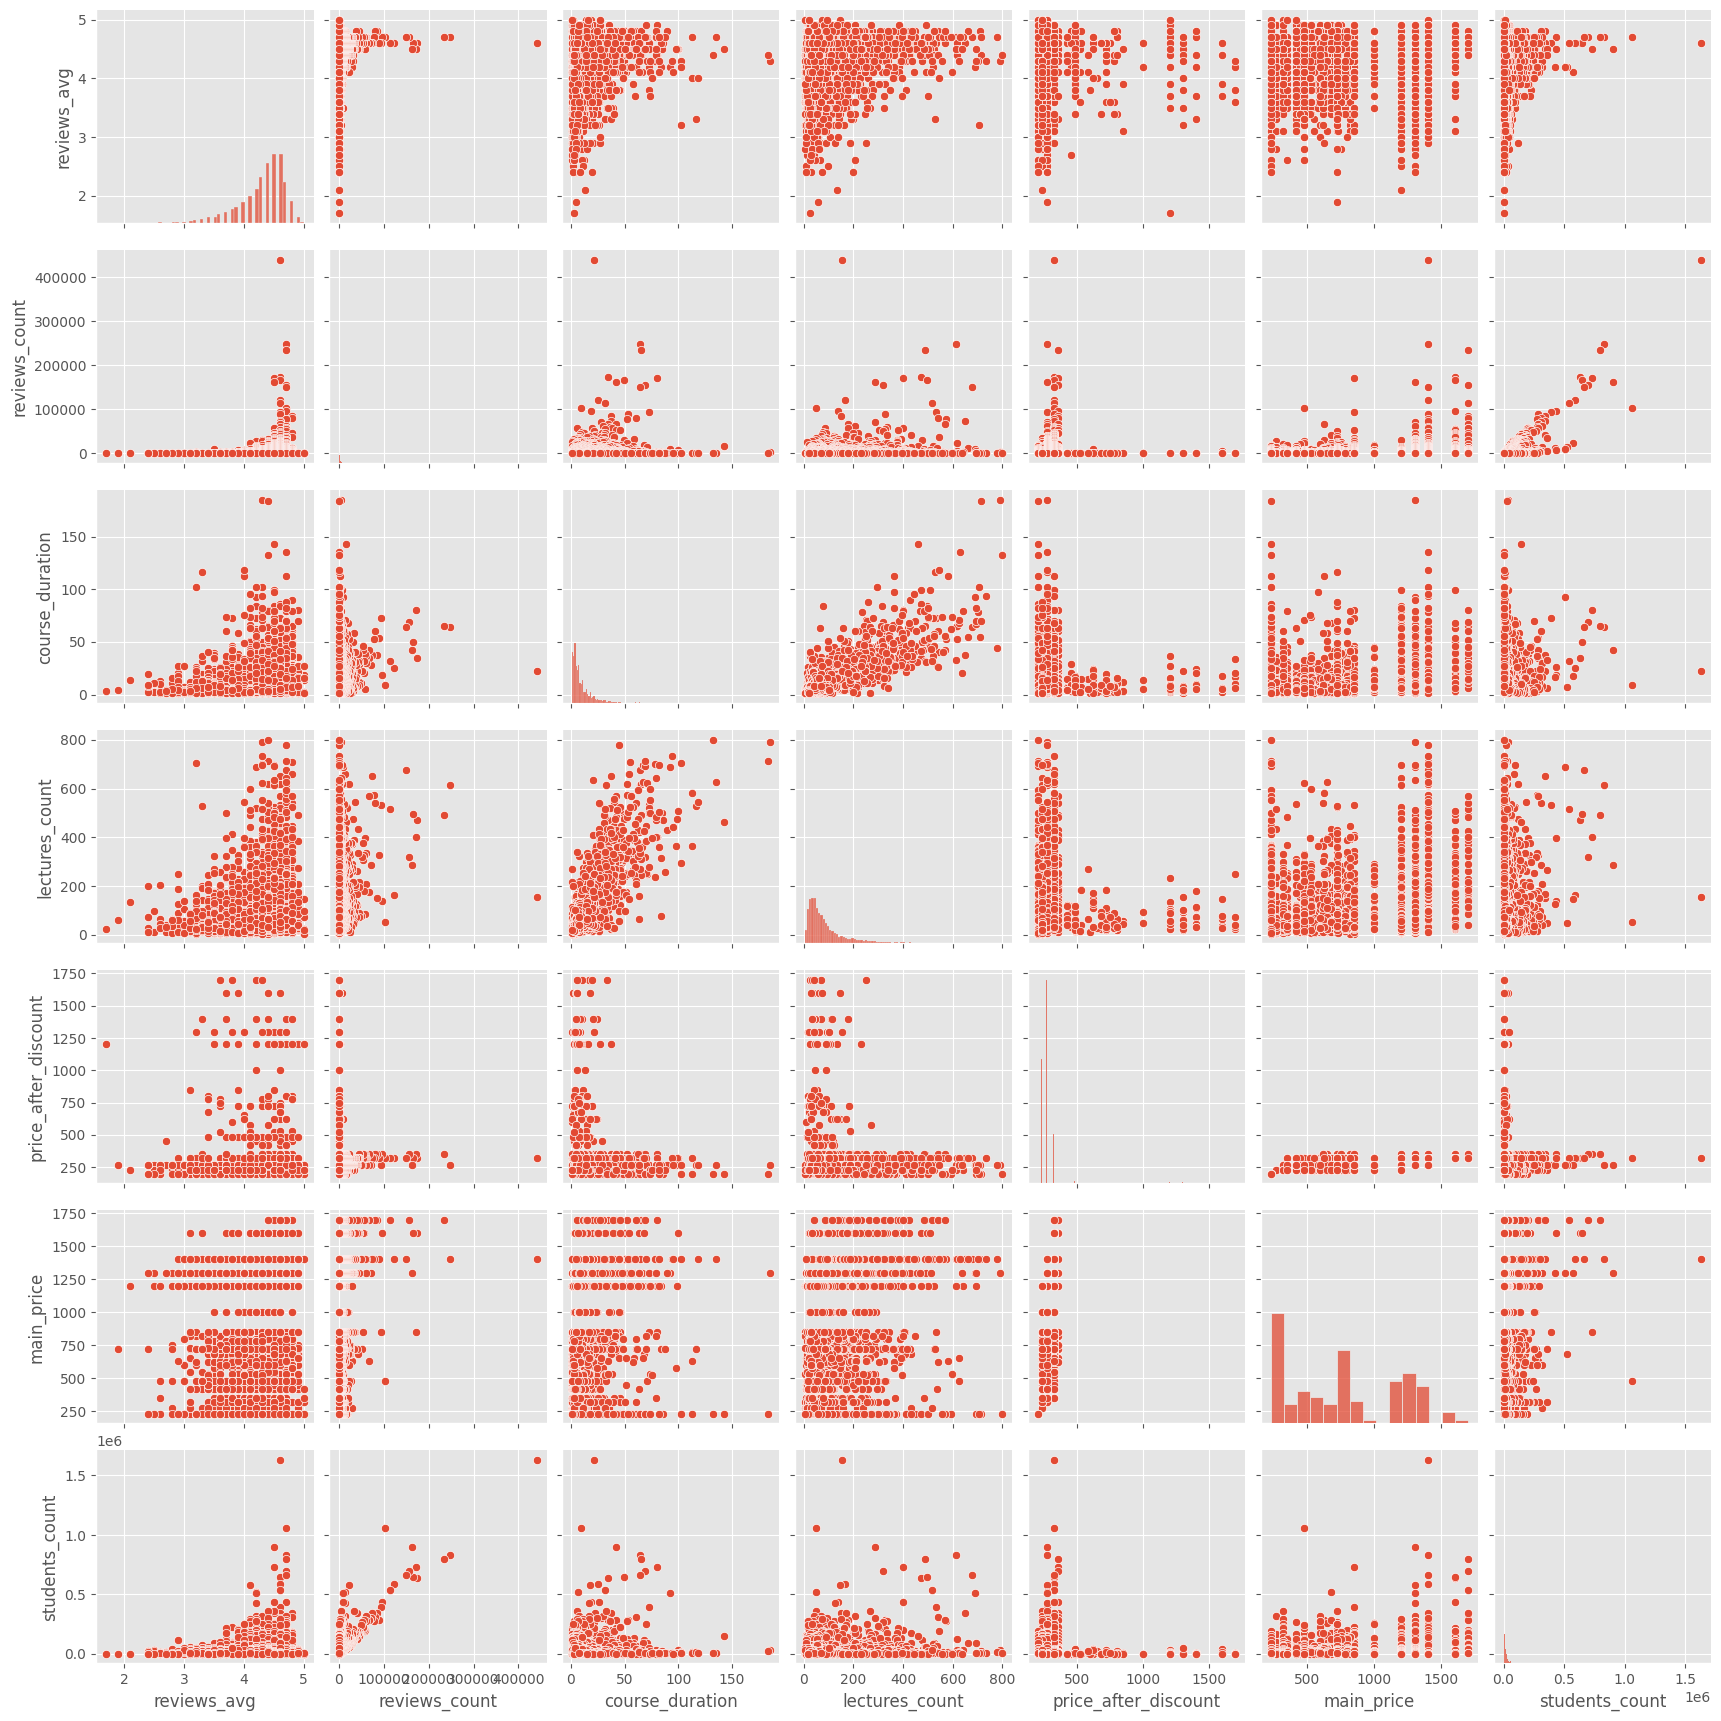

In [25]:
sns.pairplot(df);

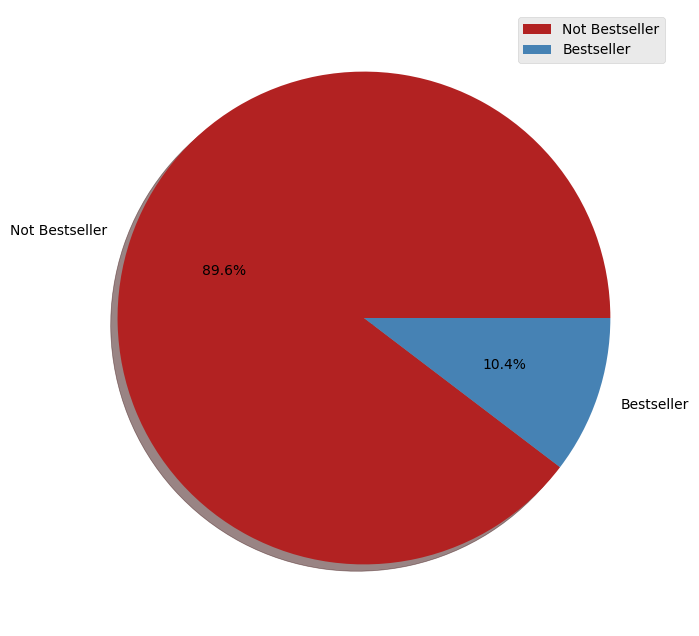

In [26]:
plt.figure(figsize = (12,8))
plt.pie(df.course_flag.value_counts(
),autopct="%1.1f%%", labels = ["Not Bestseller", "Bestseller"], shadow = True, colors = ["firebrick", "steelblue"])
plt.legend();

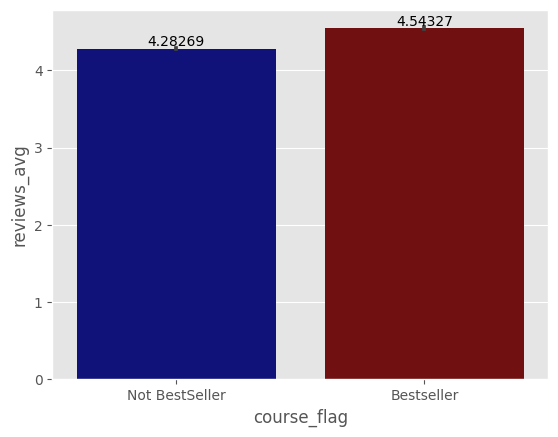

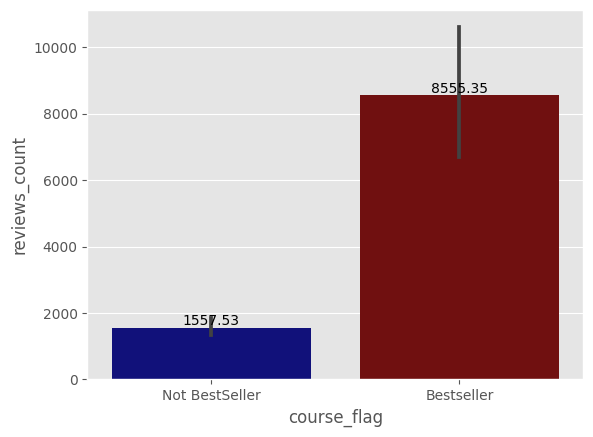

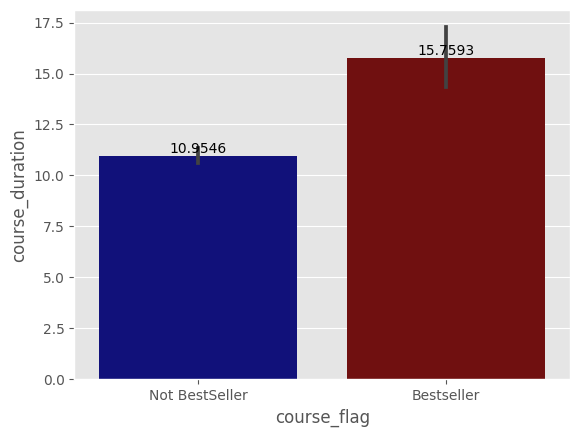

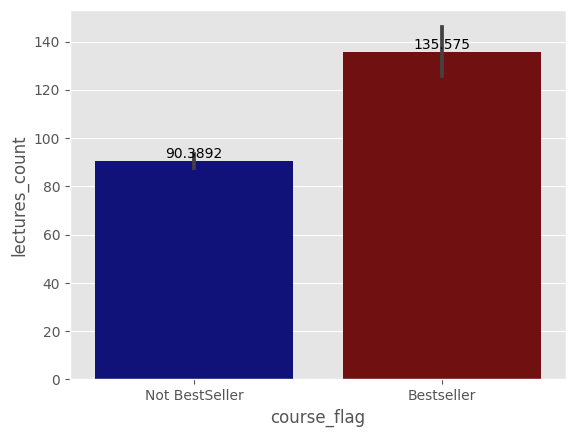

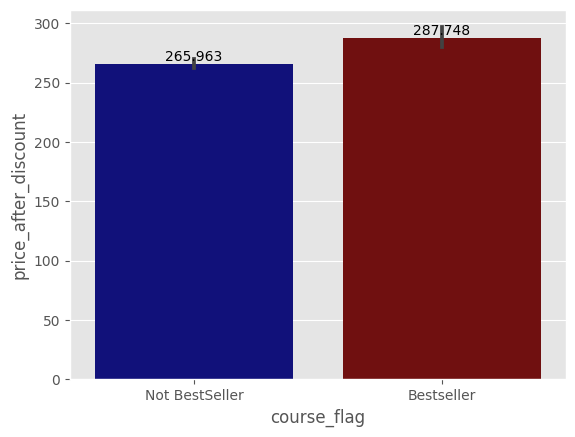

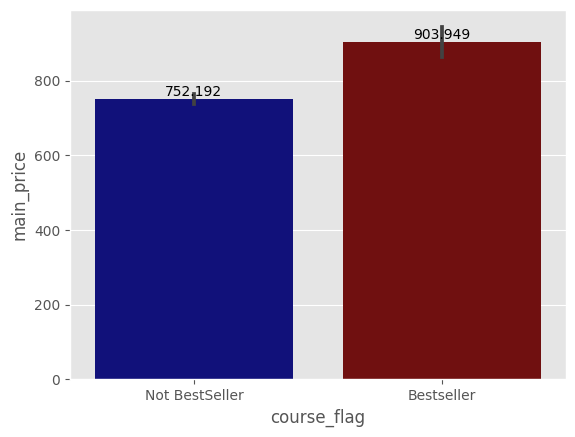

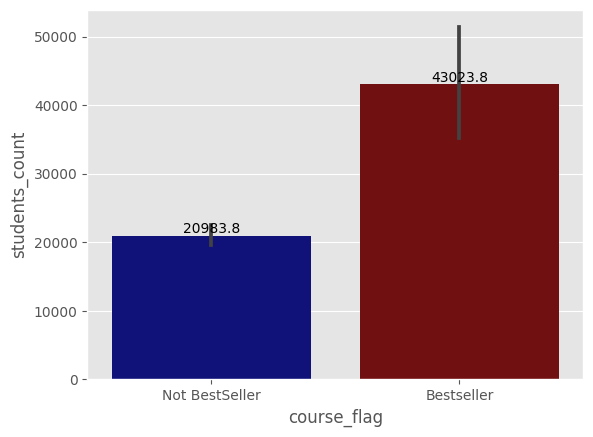

In [27]:
for col in df.select_dtypes(include = ["float64", "int64"]).columns:
    ax = sns.barplot(x = "course_flag", y = col, data = df, palette = ["darkblue", "maroon"])
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

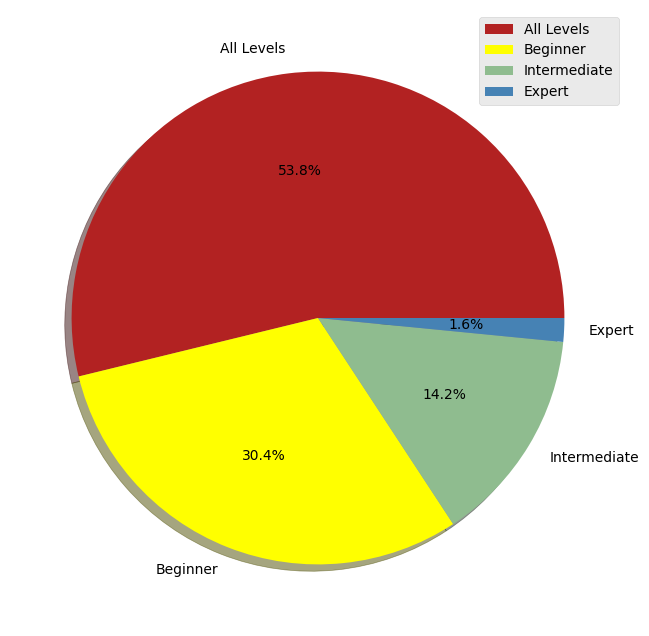

In [28]:
plt.figure(figsize = (12,8))
plt.pie(df.level.value_counts(
),autopct="%1.1f%%", 
labels = ["All Levels", "Beginner", "Intermediate", "Expert"], 
shadow = True,
colors = ["firebrick","yellow","darkseagreen","steelblue"])
plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


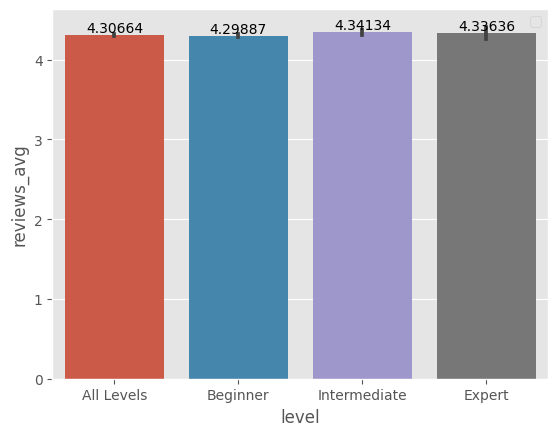

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


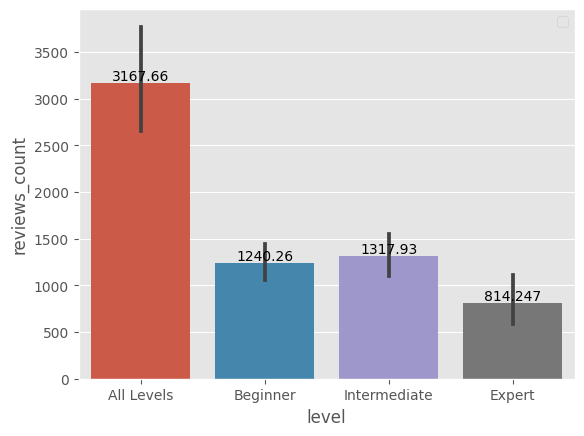

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


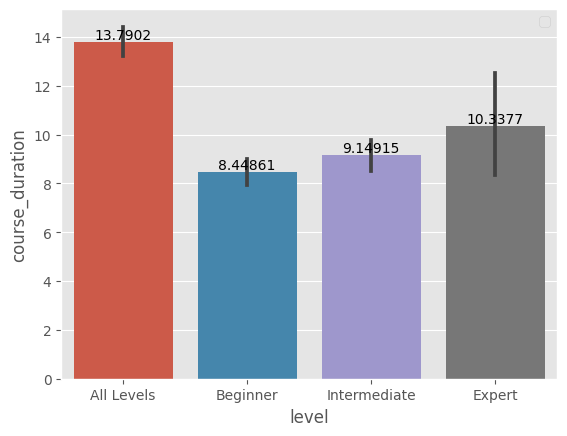

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


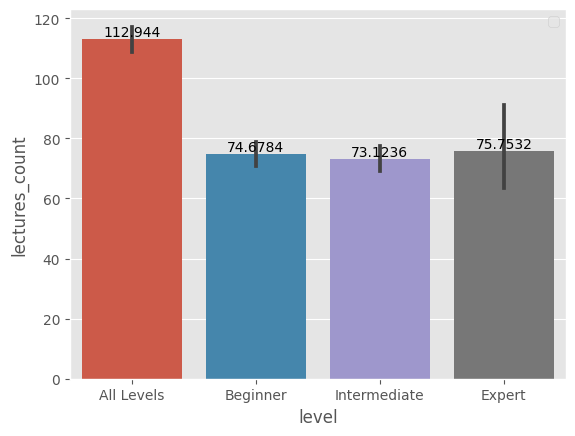

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


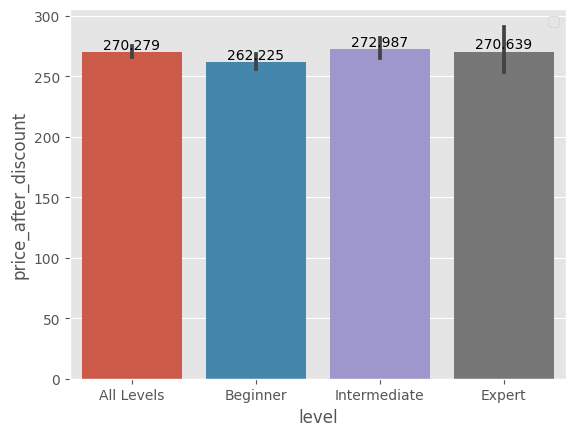

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


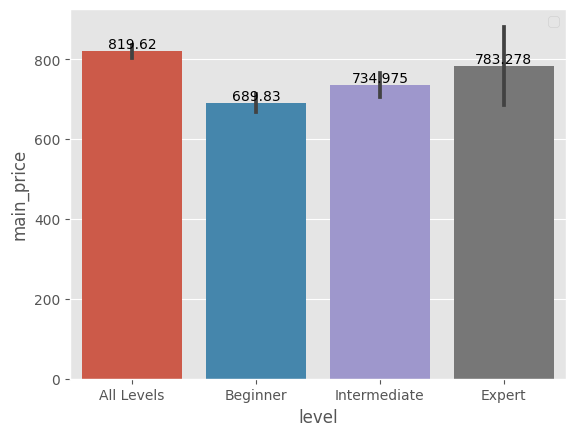

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


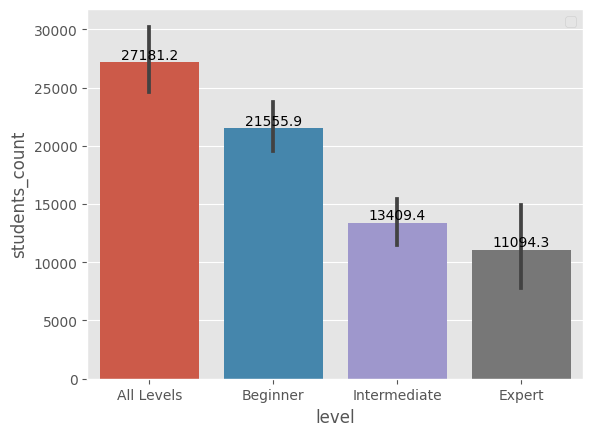

In [29]:
for col in df.select_dtypes(include = ["float64", "int64"]).columns:
    ax = sns.barplot(x = "level", y = col, data = df)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.legend()
    plt.show()

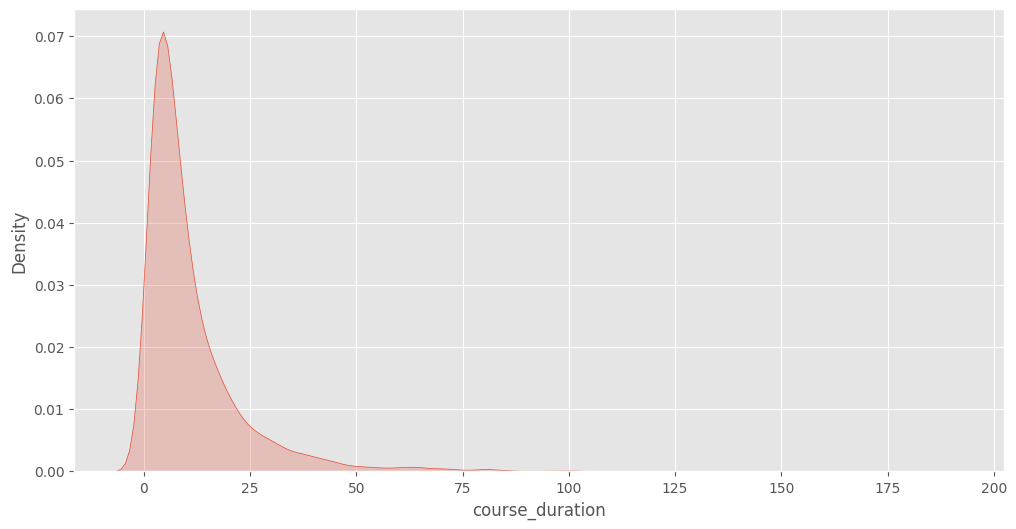

In [30]:
plt.figure(figsize = (12,6))
sns.kdeplot(df['course_duration'], shade = True);

In [31]:
top_20 = df.sort_values(by = "students_count", ascending = False)[0:20]
top_20.head(2)

,course_name,instructor,course description,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,course_flag,students_count
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,Learn Python like a Professional Start from t...,4.6,440383,22.0,155,All Levels,319.99,1399.99,Not BestSeller,1629692.0
11,Automate the Boring Stuff with Python Programming,Al Sweigart,A practical programming course for office work...,4.7,103366,9.5,51,All Levels,319.99,479.99,Not BestSeller,1060445.0


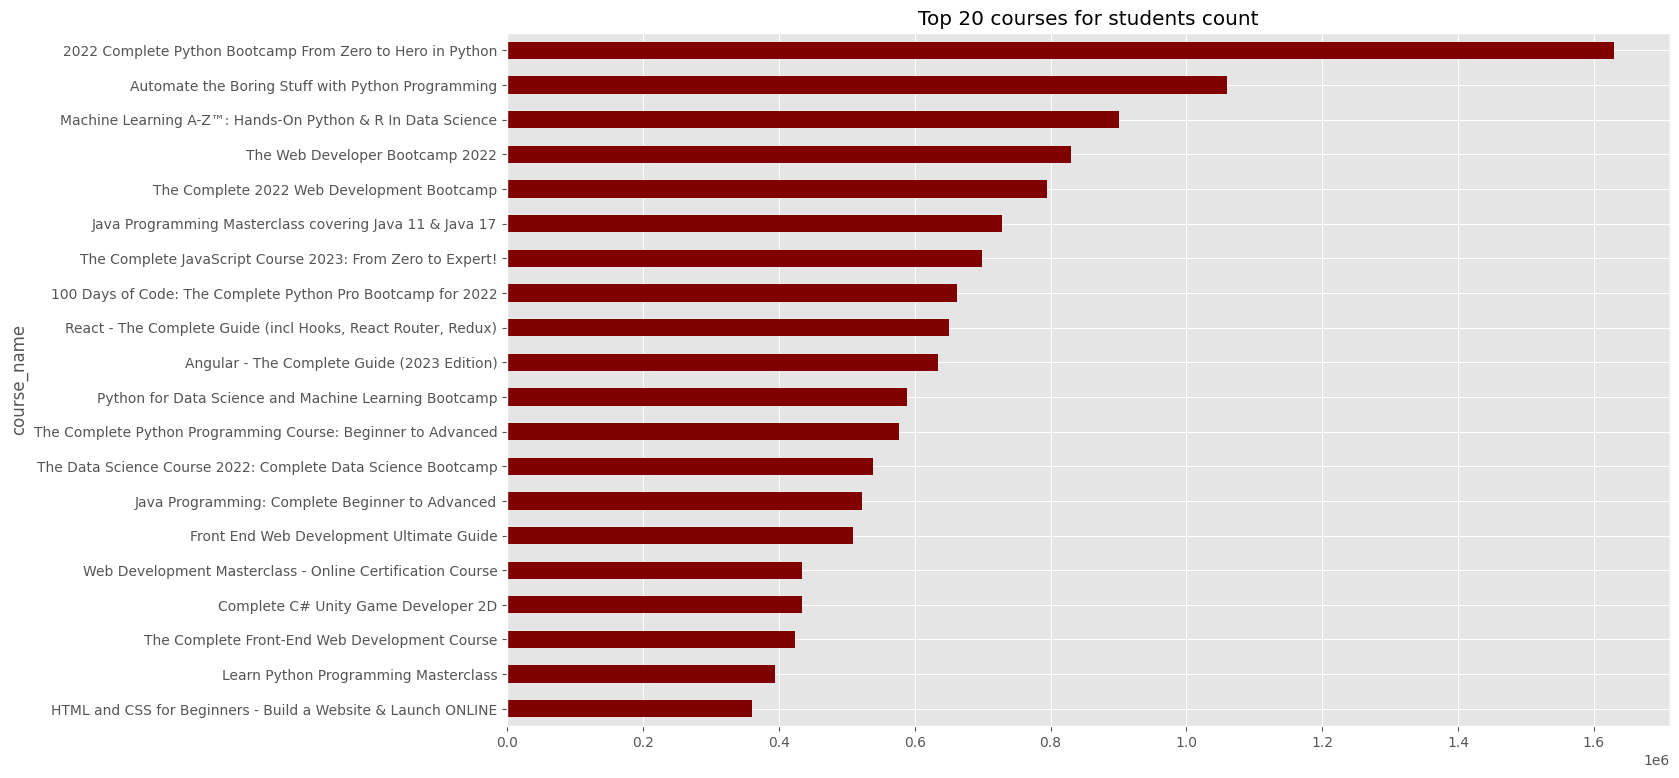

In [32]:
plt.figure(figsize = (15,9))
top_20.groupby(["course_name"])["students_count"].mean().sort_values(ascending = True).plot.barh(color = "maroon")
plt.title("Top 20 courses for students count");

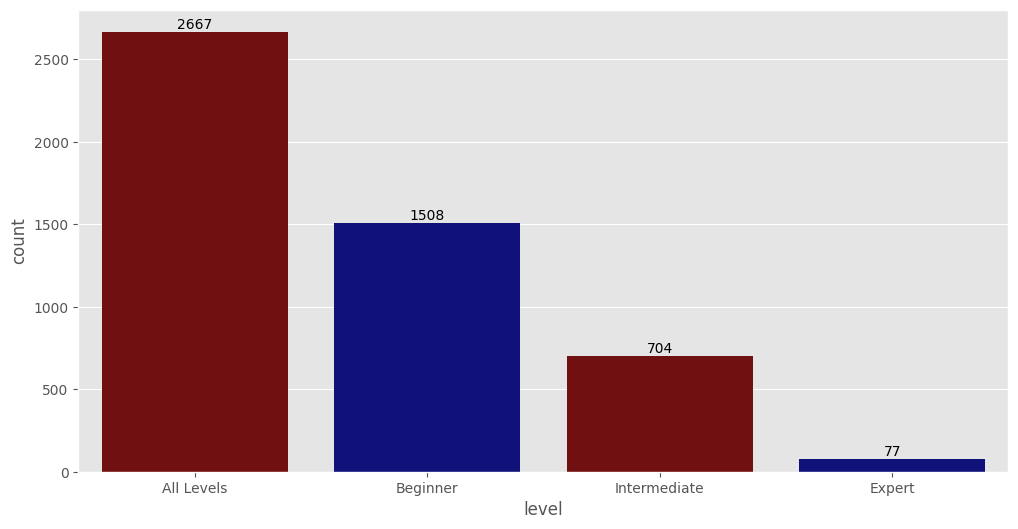

In [34]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x='level', data=df, palette = ["maroon", "darkblue"])
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
print("Average course duration of top 20 udemy courses is "+str(top_20.course_duration.mean()))

Average course duration of top 20 udemy courses is 40.775


In [ ]:
df["total_sells_discount"] = df["students_count"] * df["price_after_discount"]


In [ ]:
top_10_sells = df.sort_values(by = "total_sells_discount", ascending = False)[0:10]

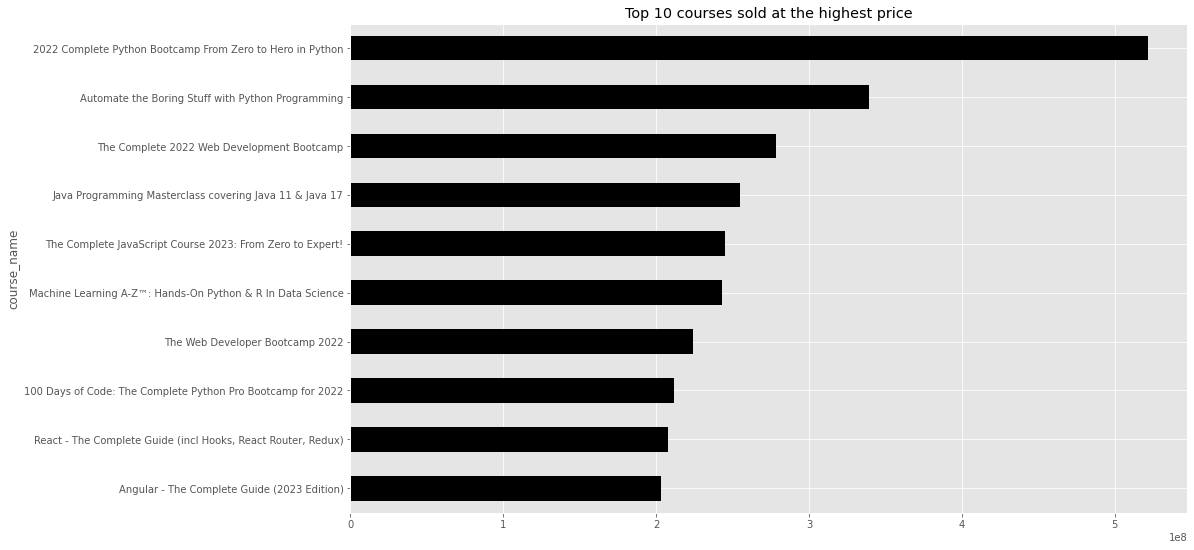

In [ ]:
plt.figure(figsize = (15,9))
top_10_sells.groupby(["course_name"])["total_sells_discount"].mean().sort_values(ascending = True).plot.barh(color = "black")
plt.title("Top 10 courses sold at the highest price");

In [ ]:
worst_30 = df.sort_values(by = "reviews_avg")[0:30]

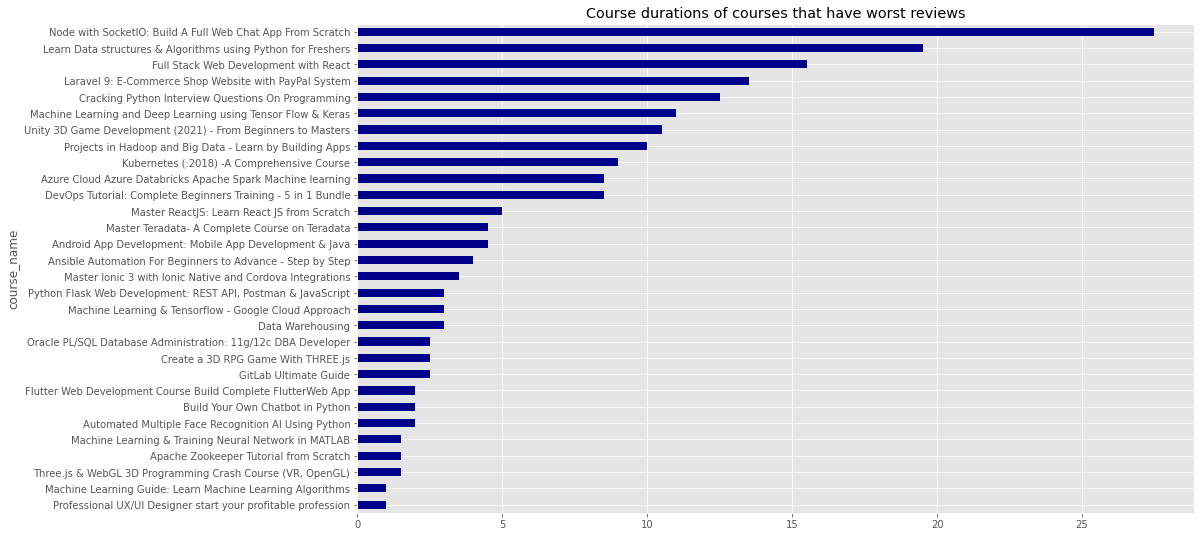

In [ ]:
plt.figure(figsize = (15,9))
worst_30.groupby("course_name")["course_duration"].mean().sort_values(
    ascending = True).plot.barh(color = "darkblue")
plt.title("Course durations of courses that have worst reviews");

In [ ]:
print("Average course duration of top 30 courses that have worst reviews is "+str(worst_30.course_duration.mean()))

Average course duration of top 30 courses that have worst reviews is 6.55
